---
# May 2, 2020 Sharp RDD in MHS ch6. in Stata
---
* Name: Jikhan Jeong
* Ref: (Data) https://economics.mit.edu/faculty/angrist/data1/mhe/dehejia
* Ref: (Code) https://github.com/vikjam/mostly-harmless-replication/tree/master/06%20Getting%20a%20Little%20Jumpy
* Ref: (Paper) https://www.princeton.edu/~davidlee/wp/RDrand.pdf
---

---
### Table 6.1.2. Lee(2008)
---
* demsharenext: Democrat vote share election t+1
* demwinnext: Democrat win prob. election t+1 
* demshareprev: Democrat vote share election t-1
* demwinprev: Democrat win prob. election t-1
* demofficeexp: Democrat political experience
* othofficeexp: Opposition political experience
* demelectexp: Democrat electoral experience	
* othelectexp: Opposition electoral experience		


In [4]:
clear all
set more off

In [5]:
* Download data and unzip the data
shell curl -o Lee2008.zip http://economics.mit.edu/faculty/angrist/data1/mhe/lee
unzipfile Lee2008.zip, replace



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  850k  100  850k    0     0  1348k      0 --:--:-- --:--:-- --:--:-- 1346k

    inflating: Lee2008/figure1.dta
    inflating: Lee2008/group_final.dta
    inflating: Lee2008/individ_final.dta
    inflating: Lee2008/public_use.do
    inflating: Lee2008/readme.txt
    inflating: Lee2008/table_one_final.dta
    inflating: Lee2008/table_two_final.dta
successfully unzipped Lee2008.zip to current directory


In [6]:
* Load the data
use "Lee2008/individ_final.dta", clear

In [7]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      yearel |     27,176    1973.238    15.77102       1946       1998
   myoutcome |     27,176    .4210333     .493734          0          1
      second |     10,343           1           0          1          1
myoutcomen~t |     26,010    .3417916    .4743193          0          1
         use |      9,674           1           0          1          1
-------------+---------------------------------------------------------
    difshare |     26,077   -.1282402    .4202124  -.9999857   .9999857
      difgrp |     26,077    173.8536    84.03275          0        399
mmyoutcome~t |      9,674    .4492454     .390601          0          1
   mrunagain |      9,674    .5642961    .3522954          0          1
  mofficeexp |      9,674    2.195989    1.993805          0   8.857142
-------------+-------------------------------------------------

In [8]:
* Create 0.005 intervals of democratic share of votes
egen i005   = cut(difshare), at(-1(0.005)1.005)

(1099 missing values generated)


In [9]:
* Take the mean within each interval
egen m_next = mean(myoutcomenext), by(i005)

In [10]:
* Predict with polynomial logit of degree 4
foreach poly of numlist 1(1)4 {
    gen poly_`poly' = difshare^`poly'
}


(1,099 missing values generated)
(1,099 missing values generated)
(1,099 missing values generated)
(1,099 missing values generated)


In [11]:
gen d = (difshare >= 0)

In [12]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      yearel |     27,176    1973.238    15.77102       1946       1998
   myoutcome |     27,176    .4210333     .493734          0          1
      second |     10,343           1           0          1          1
myoutcomen~t |     26,010    .3417916    .4743193          0          1
         use |      9,674           1           0          1          1
-------------+---------------------------------------------------------
    difshare |     26,077   -.1282402    .4202124  -.9999857   .9999857
      difgrp |     26,077    173.8536    84.03275          0        399
mmyoutcome~t |      9,674    .4492454     .390601          0          1
   mrunagain |      9,674    .5642961    .3522954          0          1
  mofficeexp |      9,674    2.195989    1.993805          0   8.857142
-------------+-------------------------------------------------

In [13]:
list in 1/5


     +-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
     | yearel   myoutc~e   second   myoutc~t   use    difshare   difgrp   mmyout~t   mrunag~n   moffic~p   melect~p   mpmyou~t   mpruna~n   mpoffi~p   mpelec~p    i005     m_next      poly_1     poly_2      poly_3     poly_4   d |
     |-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
  1. |   1946          1        .          0     .    .0614882      212          .          .          .          .          .          .          .          .     .06        .72    .0614882   .0037808    .0002325   .0000143   1 |
  2. |   1946          0        1          0     1   -.0614882      187   .

In [14]:
logit myoutcomenext c.poly_*##d


Iteration 0:   log likelihood = -15636.131  
Iteration 1:   log likelihood = -7051.9102  
Iteration 2:   log likelihood = -6181.8848  
Iteration 3:   log likelihood = -6019.3257  
Iteration 4:   log likelihood =  -5997.943  
Iteration 5:   log likelihood = -5996.8185  
Iteration 6:   log likelihood = -5996.8117  
Iteration 7:   log likelihood = -5996.8117  

Logistic regression                             Number of obs     =     24,937
                                                LR chi2(9)        =   19278.64
                                                Prob > chi2       =     0.0000
Log likelihood = -5996.8117                     Pseudo R2         =     0.6165

-------------------------------------------------------------------------------
myoutcomenext |      Coef.   Std. Err.      z    P>|z|     [95% Conf. Interval]
--------------+----------------------------------------------------------------
       poly_1 |   18.78696   3.762722     4.99   0.000     11.41216    26.16176
 

In [15]:
predict next_pr, pr
egen mp_next  = mean(next_pr), by(i005)


(1099 missing values generated)

(1099 missing values generated)


In [16]:
* Create the variables for office of experience (taken as given from Lee, 2008)
egen mp_vic   = mean(mpofficeexp), by(i005)
egen m_vic    = mean(mofficeexp), by(i005)


(3073 missing values generated)

(3073 missing values generated)


In [17]:
sum


    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
      yearel |     27,176    1973.238    15.77102       1946       1998
   myoutcome |     27,176    .4210333     .493734          0          1
      second |     10,343           1           0          1          1
myoutcomen~t |     26,010    .3417916    .4743193          0          1
         use |      9,674           1           0          1          1
-------------+---------------------------------------------------------
    difshare |     26,077   -.1282402    .4202124  -.9999857   .9999857
      difgrp |     26,077    173.8536    84.03275          0        399
mmyoutcome~t |      9,674    .4492454     .390601          0          1
   mrunagain |      9,674    .5642961    .3522954          0          1
  mofficeexp |      9,674    2.195989    1.993805          0   8.857142
-------------+-------------------------------------------------

In [19]:
* Tag each interval once for the plot
egen tag_i005 = tag(i005)

(note: file panel_a.gph not found)
(file panel_a.gph saved)


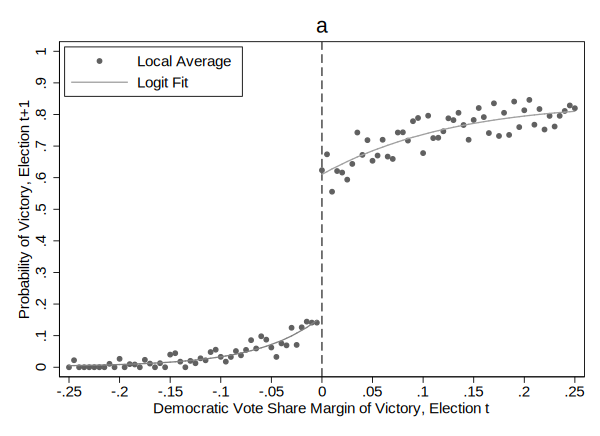

In [20]:
* Plot panel (a)
graph twoway (scatter m_next  i005, msize(small))                              ///
             (line    mp_next i005 if i005 >= 0, sort)                         ///
             (line    mp_next i005 if i005 <  0, sort)                         /// 
                if i005 > -0.251 & i005 < 0.251 & tag_i005 == 1,               /// 
                xline(0, lpattern(dash))                                       ///
                title("a")                                                     ///
                xtitle("Democratic Vote Share Margin of Victory, Election t")  /// 
                ytitle("Probability of Victory, Election t+1")                 ///
                yscale(r(0 1))        ylabel(0(.1)1)                           ///
                xscale(r(-0.25 0.25)) xlabel(-0.25(.05)0.25)                   ///
                legend(order(1 2) cols(1)                                      ///
                       ring(0) bplacement(nwest)                               ///
                       label(1 "Local Average") label(2 "Logit Fit"))          ///
                scheme(s1mono)                                                 ///
                saving(panel_a.gph, replace)

(note: file panel_b.gph not found)
(file panel_b.gph saved)


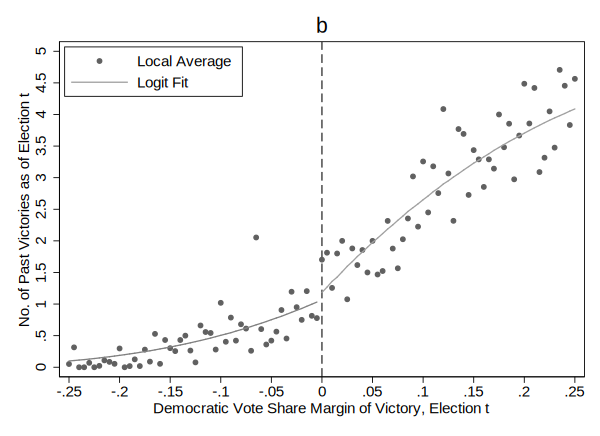

In [21]:
* Plot panel (b)
graph twoway (scatter m_vic  i005, msize(small))                               ///
             (line    mp_vic i005 if i005 >= 0, sort)                          ///
             (line    mp_vic i005 if i005 <  0, sort)                          /// 
                if i005 > -0.251 & i005 < 0.251 & tag_i005 == 1,               /// 
                xline(0, lpattern(dash))                                       ///
                title("b")                                                     ///
                xtitle("Democratic Vote Share Margin of Victory, Election t")  /// 
                ytitle("No. of Past Victories as of Election t")               ///
                yscale(r(0 5))        ylabel(0(.5)5)                           ///
                xscale(r(-0.25 0.25)) xlabel(-0.25(.05)0.25)                   ///
                legend(order(1 2) cols(1)                                      ///
                       ring(0) bplacement(nwest)                               ///
                       label(1 "Local Average") label(2 "Logit Fit"))          ///
                scheme(s1mono)                                                 ///
                saving(panel_b.gph, replace)

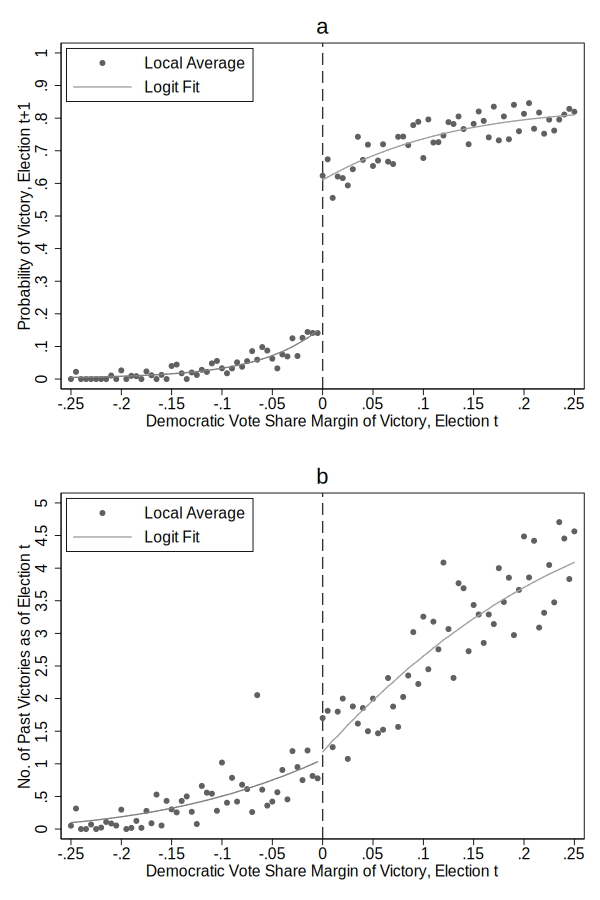

In [22]:
* Combine plots
graph combine panel_a.gph panel_b.gph, ///
    col(1)                             ///
    xsize(4) ysize(6)                  ///
    graphregion(margin(zero))          ///
    scheme(s1mono)